# <center> Gun-Violence in US- A Statistical Overview </center>

**Team 2 :**
1. *Fiona Lobo*
2. *Isha Chawla*
3. *Yash Vyas*

**Github Link- <a> http://nbviewer.jupyter.org/github/ishachawla/Gun-Violence-/tree/master/</a>**


**Data Link- <a> https://drive.google.com/drive/folders/1OJT5Qp9YEAzVpIXP7bRaciRiCEaRPVD6 </a>**

**Gun-Violence in US has a long and a very painful history and it has a lot of aspects which if not considered appropriately, will never help anyone get a good and clear understanding of the date.**
**One of the reasons we decided to work on this problem statement was to understand the complexity and the intricate problem this is and the reason why the government officials are constantly troubled to reach a better understanding and have better reforms for this.**

**How many guns are there in the U.S.?**
> *There are about 310 million guns in the country. About 40% of households have them, a fraction that has been slowly declining over the last few decades, down from about 50% in the 1960s. Meanwhile, the overall number of guns has increased to about one gun per person, up from one gun for every two persons in the 1960s. This means that gun ownership has gotten much more concentrated among fewer households: if you own one gun, you probably own several. America has the highest rate of gun ownership of any country in the world, by a wide margin (see: international comparison).*

Source- https://www.theatlantic.com/national/archive/2013/02/gun-violence-in-america-the-13-key-questions-with-13-concise-answers/272727/

<img> 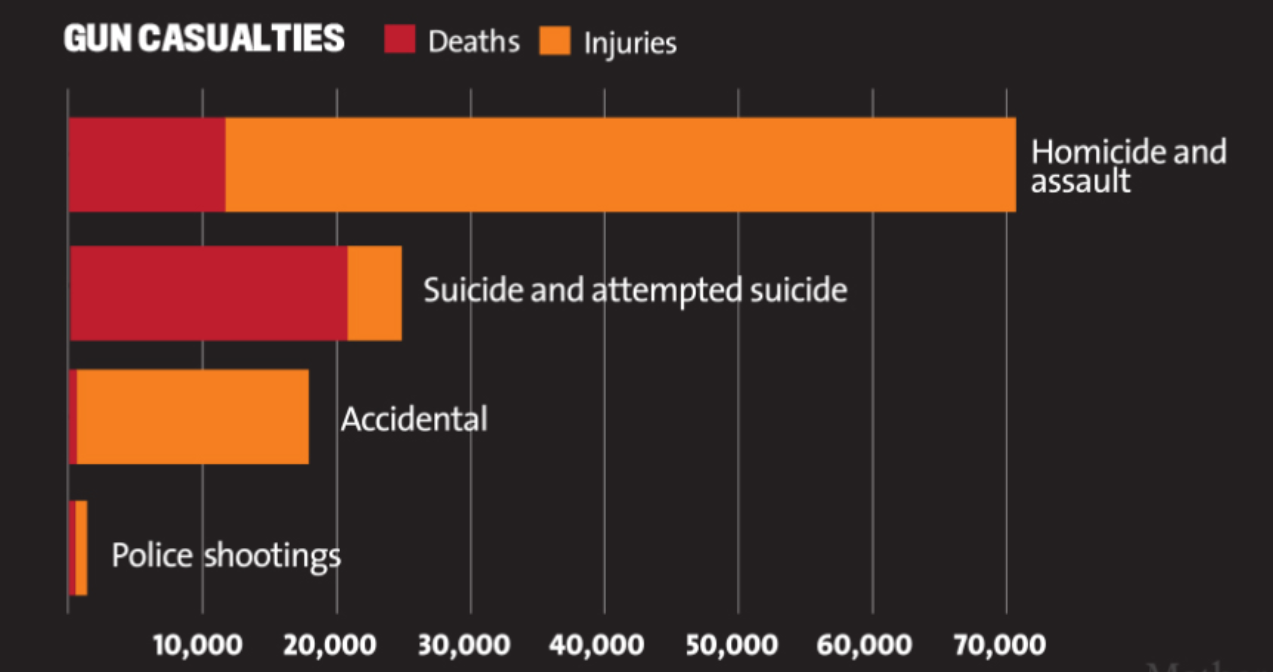 </img>

** *Over the course of this notebook we will discuss this problem in different aspects.* **
1. **GENDER**
2. **STATES**
3. **REASONS BEHIND THIS**
    - **DRUGS**
    - **DOMESTIC-VIOLENCE**
    - **SUICIDE**
    - **MASS-SHOOTINGS/HOMICIDE**

### *Introduction to the dataset.*
<a> http://www.gunviolencearchive.org </a>
> **Gun-violence archive is an indepent organization that has been trying to collect data of all the gun-related incidents happening in the country however small and keep a log of them and maintain it online for use by public to run analysis and come up with concrete solutions on how to combat the issue. The data can be downloaded from their website or from this github link <a> https://github.com/jamesqo/gun-violence-data</a>.**

>*Gun-Violence has been one of the leading causes of death in the United States of America in the past 10 years, what is the reason behind it? and why has guns that were supposed to protect people from harm, have become the reason people are scared of their lives, *Gun-Violence Archive* is a non-profit organization that provides that data from the past gun related incidents and details of the people involved, injured or dead.*

In [1024]:
#Importing the important libraries to start the functioning
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud
import seaborn as sb
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen 
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup

In [1237]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import seaborn as sb
%matplotlib inline
import decimal

In [1181]:
import plotly  #Plotly is a library for creating interactive graphs 
plotly.__version__
import plotly.plotly as py
import plotly.graph_objs as go

**Step-1 :** *Reading the csv files containing information of all the events that happened in the past year.*

In [1034]:
df=pd.read_csv("stage3.csv",parse_dates=['date'],infer_datetime_format=True)
print("Total number of columns in the dataset",df.shape[1])
print("Total number of rows in the dataset",df.shape[0])

Total number of columns in the dataset 29
Total number of rows in the dataset 239677


**Step 2 :** *Data Cleaning and Preprocessing*

In [1029]:
null_values1 =pd.DataFrame(df.isnull().sum()).reset_index()
null_values1.rename(columns={'index': 'RowNames', 0: 'Blank RowCount'},inplace=True)
null_values1['Precent Blank Values']=(null_values1['Blank RowCount']/len(df))*100
null_values1=null_values1.sort_values(['Precent Blank Values'],ascending=False)
null_values1.head()

,RowNames,Blank RowCount,Precent Blank Values
23,participant_relationship,223903,93.418643
15,location_description,197588,82.439283
22,participant_name,122253,51.007397
11,gun_stolen,99498,41.513370
17,n_guns_involved,99451,41.493760


*The first step is to find out if we have any null and incomplete values and over the course of this notebook we will identify that this dataset has a lot of incomplete and inconsistent information and we need to perform a lot of different type of preprocessing activities to do our analysis on every step of the way.*

In [1035]:
#A lot of these columns are not required for our analysis and a lot of them have more null values
#than we can fill so our first step will be eliminating these values.
print(list(df))
df=df.drop(['address','incident_url','source_url', 'incident_url_fields_missing', 'congressional_district','sources', 'state_house_district', 'state_senate_district','participant_relationship','participant_name','gun_stolen','latitude','longitude'],axis=1)
print("The total number of columns after dropping unnecessary columns are",df.shape[1])

['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'sources', 'state_house_district', 'state_senate_district']
The total number of columns after dropping unnecessary columns are 16


*Before progressing any further we will try and use the worldcloud technique on the incident-characteritics column which contains 2-3 sentences about the event and try and put this in a cloud and see what we can find.*

In [1037]:
#A look at the incident-characteristics column, as evident it has a lot of characters that need to be removed for better access of information
df['incident_characteristics'][0]

'Shot - Wounded/Injured||Mass Shooting (4+ victims injured or killed excluding the subject/suspect/perpetrator, one location)||Possession (gun(s) found during commission of other crimes)||Possession of gun by felon or prohibited person'

In [1038]:
df['incident_characteristics']=df['incident_characteristics'].str.replace('|'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('/'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('('," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace(')'," ")
df['incident_characteristics']=df['incident_characteristics'].str.replace('-'," ")
df['incident_characteristics']=df['incident_characteristics'].str.lower()
df['incident_characteristics']=df['incident_characteristics'].astype(str)

In [1039]:
#Saving all the data in a list
text=[]
for i in range(len(df)):
    text.append(df['incident_characteristics'][i])

*Using the wordcloud function on the list to get some more info about the incidents.*

A look at the data can show us that (accidental,suicide,wounded,murder)were some of the keywords that we will investigate


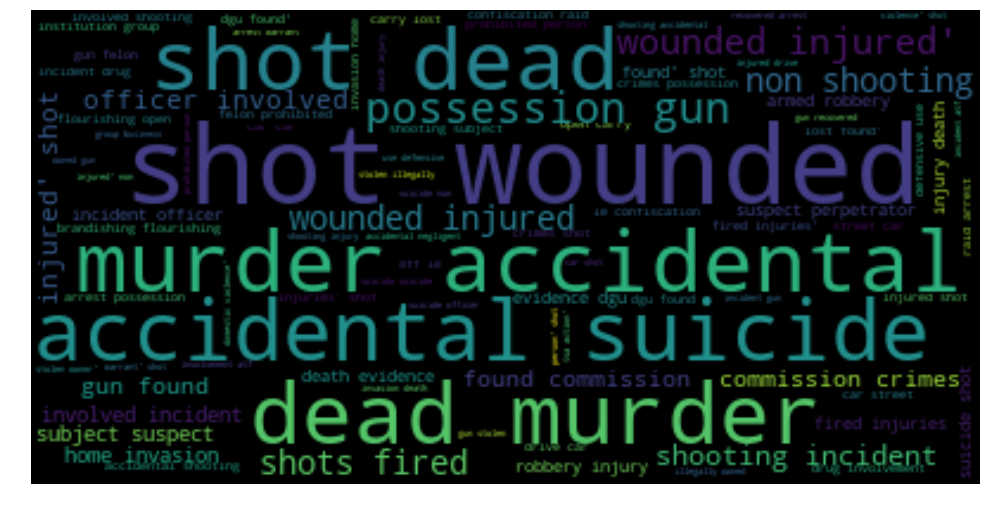

In [1046]:
wordcloud = WordCloud().generate(str(text))
sb.set(rc={'figure.figsize':(17,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("A look at the data can show us that (accidental,suicide,wounded,murder)were some of the keywords that we will investigate")

**Step- 2A: ** *Filling the number of guns involved with the median of guns involved**

In [1047]:
#Filling the blanks to get to better results, for the number of guns involved use the median
df['n_guns_involved'][df['n_guns_involved'].isnull()]=df['n_guns_involved'].median()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [1049]:
#Cross-checking if there are any null values still in the guns involved column
df[df['n_guns_involved'].isnull()]

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,location_description,n_guns_involved,notes,participant_age,participant_age_group,participant_gender,participant_status,participant_type


In [1051]:
#Looking at the age column, we see that the value is saved in a complicated manner so we need to use string-manipulation functions to  get informaton about all the involved participant ages.
df['participant_age'][2]

'0::25||1::31||2::33||3::34||4::33'

In [1052]:
df['participant_age']=df['participant_age'].str.replace("|"," ")
df['participant1-age']=df['participant_age'].str[3:5] ##Getting info of the first participant
df['participant2-age']=df['participant_age'].str[10:12] ##Getting info of the second participant
df['participant3-age']=df['participant_age'].str[17:19] ##Getting info of the third participant
df['participant4-age']=df['participant_age'].str[24:26] ##Getting info of the fourth participant
df['participant5-age']=df['participant_age'].str[31:33] ##Getting info of the fifth participant
#An important thing to note here is that participants from 2 to 5 can have null values since, its not necessary that there are more than 1 participants so we will subset the data and remove these null values as and when we need them.
df['participant1-age']=df['participant1-age'].str.replace(":","")
df['participant1-age']=df['participant1-age'].str.replace("'","")
df['participant1-age'][df['participant1-age']==""]=np.nan #Apart from nulls there are also blanks so we replace them with nulls, makes it easier for us to identify them
df['participant2-age'][df['participant2-age']==""]=np.nan
df['participant3-age'][df['participant3-age']==""]=np.nan
df['participant4-age'][df['participant4-age']==""]=np.nan
df['participant5-age'][df['participant5-age']==""]=np.nan
median_age=df['participant1-age'][df['participant1-age'].isnull()==False].astype(int).median() 
#Filling the first participant's age using the median values
df['participant1-age'][df['participant1-age'].isnull()==True]=median_age

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from 

In [1053]:
df.shape #after adding the participants ages columns

(239677, 21)

In [1054]:
df['participant_gender'][4] ##Again, we will use string functions to get values for all the 5 participants

'0::Female||1::Male||2::Male||3::Female'

In [1055]:
df['participant1_gender']=df['participant_gender'].str.split("|",expand=True)[0].str[3:4]
df['participant2_gender']=df['participant_gender'].str.split("|",expand=True)[2].str[3:4]
df['participant3_gender']=df['participant_gender'].str.split("|",expand=True)[4].str[3:4]
df['participant4_gender']=df['participant_gender'].str.split("|",expand=True)[6].str[3:4]
df['participant5_gender']=df['participant_gender'].str.split("|",expand=True)[8].str[3:4]

In [1058]:
df['participant_type'][4] ##Participant Type contains information about probable suspects and victims

'0::Victim||1::Victim||2::Victim||3::Subject-Suspect'

In [1056]:
df['participant1_type']=df['participant_type'].str.split("|",expand=True)[0].str[-7:]
df['participant2_type']=df['participant_type'].str.split("|",expand=True)[2].str[-7:]
df['participant3_type']=df['participant_type'].str.split("|",expand=True)[4].str[-7:]
df['participant4_type']=df['participant_type'].str.split("|",expand=True)[6].str[-7:]
df['participant5_type']=df['participant_type'].str.split("|",expand=True)[8].str[-7:]

In [1057]:
df['participant1_type']=df['participant1_type'].str.replace(":","")
df['participant2_type']=df['participant2_type'].str.replace(":","")
df['participant3_type']=df['participant3_type'].str.replace(":","")
df['participant4_type']=df['participant4_type'].str.replace(":","")
df['participant5_type']=df['participant5_type'].str.replace(":","")

In [1059]:
print("The total number of columns in the dataset after adding all the information about participants",df.shape[1])

The total number of columns in the dataset after adding all the information about participants 31


** *One issue in the dataset is that, though there is the information about what inspired or instigated these incidents and to find out that I used the incident characteristics columns to run a search and find keywords and grouping instances by them, an important thing to note here is that an incident can fall into multiple categories- a mass shooting can be because of a felon or a drug related incident.* **

In [1060]:
df['mass-shooting']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('mass shooting')))
df['suicide']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('suicide')))
df['drug']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('drug')))
df['domestic violence']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('domestic violence')))
df['felon']=df['incident_characteristics'].apply(lambda x: any(pd.Series(x).str.contains('felon')))

In [1351]:
index1_dom=test_df1['notes'][test_df1['notes'].apply(lambda x: any(pd.Series(x).str.contains('wife shot')))].index
index2_dom=test_df1['notes'][test_df1['notes'].apply(lambda x: any(pd.Series(x).str.contains('husband shot')))].index
index3_dom=test_df1['notes'][test_df1['notes'].apply(lambda x: any(pd.Series(x).str.contains('gf shot')))].index
index4_dom=test_df1['notes'][test_df1['notes'].apply(lambda x: any(pd.Series(x).str.contains('bf shot')))].index

In [1282]:
domestic=len(df[df['domestic violence']==True])
suicide=len(df[df['suicide']==True])
drug=len(df[df['drug']==True])
felon=len(df[df['felon']==True])
mass_shoot=len(df[df['mass-shooting']==True])
total=domestic+suicide+drug+felon+mass_shoot
new={'Categories':['domestic-violence','suicide','drug','felon','mass_shoot'],
              'Values':[domestic,suicide,drug,felon,mass_shoot],
               'Percent values':[(domestic/total)*100,(suicide/total)*100,(drug/total)*100,
                                (felon/total)*100,(mass_shoot/total)*100]}
new=pd.DataFrame(new)
new=new.sort_values(['Percent values'],ascending=False)
new.head()

,Categories,Percent values,Values
1,suicide,52.789508,55505
2,drug,19.017728,19996
3,felon,16.325230,17165
0,domestic-violence,10.310622,10841
4,mass_shoot,1.556912,1637


Text(0.5,1,'The main reason behind gun-violence crimes by percentage')

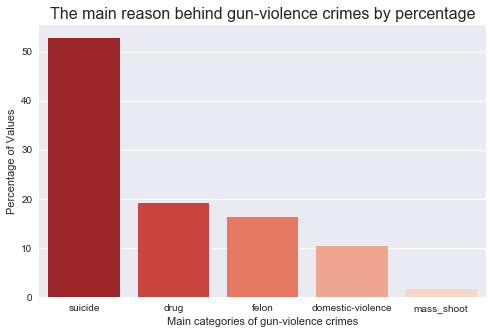

In [1334]:
sb.set(rc={'figure.figsize':(8,5)})
sb.set_style("darkgrid")
sb.barplot(new['Categories'],new['Percent values'],palette='Reds_r')
plt.xlabel("Main categories of gun-violence crimes")
plt.ylabel("Percentage of Values")
plt.title("The main reason behind gun-violence crimes by percentage",fontsize=16)

In [1065]:
df['Year']=df.date.dt.year
df['Month']=df.date.dt.month
df.head() #A look at the new dataset

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,location_description,n_guns_involved,...,participant3_type,participant4_type,participant5_type,mass-shooting,suicide,drug,domestic violence,felon,Year,Month
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,shot wounded injured mass shooting 4+ vict...,NaN,1.0,...,Victim,Victim,Suspect,True,False,False,False,True,2013,1
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,"shot wounded injured shot dead murder, a...",NaN,1.0,...,Victim,Victim,Suspect,True,True,False,False,False,2013,1
2,478855,2013-01-01,Ohio,Lorain,1,3,0::Unknown||1::Unknown,"shot wounded injured shot dead murder, a...",Cotton Club,2.0,...,Victim,Victim,Victim,False,True,False,False,False,2013,1
3,478925,2013-01-05,Colorado,Aurora,4,0,NaN,"shot dead murder, accidental, suicide off...",NaN,1.0,...,Victim,Suspect,None,False,True,True,False,False,2013,1
4,478959,2013-01-07,North Carolina,Greensboro,2,2,0::Handgun||1::Handgun,"shot wounded injured shot dead murder, a...",NaN,2.0,...,Victim,Suspect,None,False,True,False,True,False,2013,1


*The first step in our analysis is to find out what number of incidents take place in every state and then by county or city-determining which states are more unsafe than others.*

In [1068]:
state=df.groupby(['state'])['n_killed','n_injured'].agg('sum').reset_index()
state=state.sort_values('n_killed',ascending=False)
state.head() #The top 5 states with the most fatalities 

,state,n_killed,n_injured
4,California,5562,7644
43,Texas,5046,6106
9,Florida,3909,7072
13,Illinois,3409,13514
35,Ohio,2508,5703


In [1080]:
state_to_code = {'District of Columbia' : 'dc','Mississippi': 'MS', 'Oklahoma': 'OK', 'Delaware': 'DE', 'Minnesota': 'MN', 'Illinois': 'IL', 'Arkansas': 'AR', 'New Mexico': 'NM', 'Indiana': 'IN', 'Maryland': 'MD', 'Louisiana': 'LA', 'Idaho': 'ID', 'Wyoming': 'WY', 'Tennessee': 'TN', 'Arizona': 'AZ', 'Iowa': 'IA', 'Michigan': 'MI', 'Kansas': 'KS', 'Utah': 'UT', 'Virginia': 'VA', 'Oregon': 'OR', 'Connecticut': 'CT', 'Montana': 'MT', 'California': 'CA', 'Massachusetts': 'MA', 'West Virginia': 'WV', 'South Carolina': 'SC', 'New Hampshire': 'NH', 'Wisconsin': 'WI', 'Vermont': 'VT', 'Georgia': 'GA', 'North Dakota': 'ND', 'Pennsylvania': 'PA', 'Florida': 'FL', 'Alaska': 'AK', 'Kentucky': 'KY', 'Hawaii': 'HI', 'Nebraska': 'NE', 'Missouri': 'MO', 'Ohio': 'OH', 'Alabama': 'AL', 'Rhode Island': 'RI', 'South Dakota': 'SD', 'Colorado': 'CO', 'New Jersey': 'NJ', 'Washington': 'WA', 'North Carolina': 'NC', 'New York': 'NY', 'Texas': 'TX', 'Nevada': 'NV', 'Maine': 'ME'}
state['state_code'] = state['state'].apply(lambda x : state_to_code[x])

#Adding the state codes to the dataset.

*For the graphs, I am using the **plotly** library to make more interactive graphs.*

In [1082]:
data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = state['state_code'],
        z = state['n_killed']+state['n_injured'],
        locationmode = 'USA-states',
        text = state['state_code'],
        marker = dict(
        line = dict (
        color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Gun Violence Incidents")
        ) ]

layout = dict(
        title = 'State wise number of Gun Violence Incidents',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = go.Figure(data=data, layout=layout)
py.iplot( fig, filename='d3-cloropleth-map' )

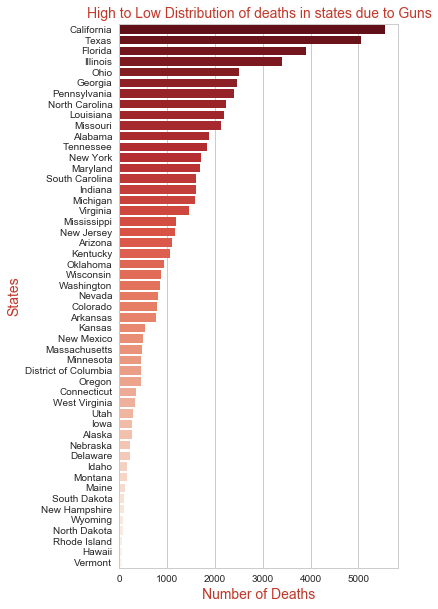

The state with the maximum number of deaths is Illinois with around 5562
On an average every state has almost 1185 deaths


In [1084]:
sb.set(rc={'figure.figsize':(5,10)})
sb.set_style("whitegrid")
sb.barplot(x=state['n_killed'],y=state['state'],palette="Reds_r")
plt.xlabel("Number of Deaths",fontsize=14,color='#C0392B')
plt.ylabel("States",fontsize=14,color='#C0392B')
plt.title("High to Low Distribution of deaths in states due to Guns",fontsize=14,color='#C0392B')
plt.show()
print("The state with the maximum number of deaths is Illinois with around",state['n_killed'].max())
print("On an average every state has almost",int(state['n_killed'].mean()),"deaths")

In [1089]:
state['total-incidents']=state['n_killed']+state['n_injured']
print("Total number of gun related incidents in the states",state['total-incidents'].sum())
totalcases=state['total-incidents'].sum()
state.head()
state.describe().transpose() 

Total number of gun related incidents in the states 178870


,count,mean,std,min,25%,50%,75%,max
n_killed,51.0,1185.647059,1246.782544,57.0,270.0,799.0,1698.0,5562.0
n_injured,51.0,2321.607843,2550.606870,52.0,596.0,1347.0,3366.5,13514.0
total-incidents,51.0,3507.254902,3685.123682,125.0,941.5,2140.0,4951.5,16923.0


*A csv with state-populations*

In [1090]:
states=pd.read_csv("states.csv") #Reading the csv file

In [1313]:
new_df1=pd.merge(state,states, how='left',left_on=['state'],right_on=['State']).dropna()
new_df1=new_df1.drop(['Rank','State'],axis=1)
new_df1=new_df1.sort_values(['n_killed'],ascending=False)
new_df1.head()
new_df1['Incidentsper100k']=new_df1['total-incidents']/new_df1['Population']*100000
new_df1=new_df1.sort_values(['Incidentsper100k'],ascending=False)
new_df1.head()

,state,n_killed,n_injured,state_code,total-incidents,Population,Incidentsper100k
8,Louisiana,2179,4398,LA,6577,4533372.0,145.079645
3,Illinois,3409,13514,IL,16923,12830632.0,131.895296
40,Delaware,217,853,DE,1070,897934.0,119.162433
18,Mississippi,1176,1883,MS,3059,2967297.0,103.090456
10,Alabama,1880,2998,AL,4878,4779736.0,102.055846


In [1360]:
trace0 = go.Bar(
    x=new_df1['state'],
    y=new_df1['Incidentsper100k'],
    name='Incidents per 100k',
    marker=dict(
        color='Coral'
    )
)
layout = go.Layout(
    title='Gun related incidents per100k people in each state')
data=[trace0]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [1115]:
pd.DataFrame(new_df1['Incidentsper100k'].describe()).transpose()
print("On an average",int(new_df1['Incidentsper100k'].mean()),"people get affected by gun related crimes")
print("The state with the least number of incidents per 100k is",str(new_df1['state'][new_df1['Incidentsper100k']==new_df1['Incidentsper100k'].min()]))

On an average 55 people get affected by gun related crimes
The state with the least number of incidents per 100k is 49    Hawaii
Name: state, dtype: object


In [1142]:
new_df1[['state','total-incidents','Incidentsper100k']][(new_df1['state']=='Wyoming')|(new_df1['state']=='Vermont')]

,state,total-incidents,Incidentsper100k
46,Wyoming,125,22.177827
50,Vermont,130,20.775369


In [1239]:
print(" -------------The states with the least number of incidents over the years-----------------")
print(new_df1[['state','total-incidents','Incidentsper100k']].sort_values(['total-incidents']).head())
print(" -------------The states with the least number of incidents per 100k-----------------")
print(new_df1[['state','total-incidents','Incidentsper100k']].sort_values(['Incidentsper100k']).head())
print(" ------The states with the least number of incidents over the years but a higher Incidentsper100k rate-------------")
print(new_df1[['state','total-incidents','Incidentsper100k']][(new_df1['state']=='Wyoming')|(new_df1['state']=='Vermont')])
print("** A look at this data tells us that though Wyoming has the least number of incidents, the incidents per 100k are double compared to Hawaii**")

 -------------The states with the least number of incidents over the years-----------------
           state  total-incidents  Incidentsper100k
46       Wyoming              125         22.177827
50       Vermont              130         20.775369
49        Hawaii              148         10.879945
47  North Dakota              199         29.587074
44  South Dakota              204         25.055884
 -------------The states with the least number of incidents per 100k-----------------
            state  total-incidents  Incidentsper100k
49         Hawaii              148         10.879945
45  New Hampshire              232         17.622885
43          Maine              244         18.368501
41          Idaho              315         20.094643
50        Vermont              130         20.775369
 ------The states with the least number of incidents over the years but a higher Incidentsper100k rate-------------
      state  total-incidents  Incidentsper100k
46  Wyoming              125 

**Now, we start focusing on incidents of a certain type, most of the shootings that happen have a reason behind them, sometimes- Drug Related Abuse, Domestic Violence, a convicted felon involved, mass-shootings.**
> ** *The first case we consider is* ** MASS-SHOOTING ** *these are the incidents that we have seen the most increase in the past couple of years.* **

In [1158]:
import decimal

In [1164]:
deaths=len(df['n_killed'])
print("Total number of mass shooting incidents",len(df[df['mass-shooting']==True]))
print("Percentage of incidents that are mass shootings",round((len(df[df['mass-shooting']==True])/deaths)*100,2))

Total number of mass shooting incidents 1637
Percentage of incidents that are mass shootings 0.68


In [1160]:
#Incidents because of mass-shooting
mass=df[df['mass-shooting']==True]
mass.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,gun_type,incident_characteristics,location_description,n_guns_involved,...,participant3_type,participant4_type,participant5_type,mass-shooting,suicide,drug,domestic violence,felon,Year,Month
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,NaN,shot wounded injured mass shooting 4+ vict...,NaN,1.0,...,Victim,Victim,Suspect,True,False,False,False,True,2013,1
1,460726,2013-01-01,California,Hawthorne,1,3,NaN,"shot wounded injured shot dead murder, a...",NaN,1.0,...,Victim,Victim,Suspect,True,True,False,False,False,2013,1
5,478948,2013-01-07,Oklahoma,Tulsa,4,0,NaN,"shot dead murder, accidental, suicide hom...",Fairmont Terrace,1.0,...,Victim,Victim,Suspect,True,True,False,False,False,2013,1
6,479363,2013-01-19,New Mexico,Albuquerque,5,0,0::22 LR||1::223 Rem [AR-15],"shot dead murder, accidental, suicide mas...",NaN,2.0,...,Victim,Victim,Victim,True,True,False,True,False,2013,1
7,479374,2013-01-21,Louisiana,New Orleans,0,5,NaN,shot wounded injured drive by car to stree...,NaN,1.0,...,Victim,Victim,Victim,True,False,False,False,False,2013,1


In [1170]:
#States with the most number of mass-shootings/killing incidents
new_df2=mass.groupby(['state'])[["n_killed","n_injured"]].sum().reset_index().sort_values(['n_killed'],ascending=False)
new_df2['total-incidents']=new_df2['n_killed']+new_df2['n_injured']
new_df2.head()

,state,n_killed,n_injured,total-incidents
4,California,202,780,982
39,Texas,190,389,579
9,Florida,189,524,713
11,Illinois,106,611,717
10,Georgia,80,260,340


In [1172]:
new_df3=pd.merge(new_df2,states, how='left',left_on=['state'],right_on=['State']).dropna()
new_df3=new_df3.drop(['Rank','State'],axis=1)
new_df3=new_df3.sort_values(['n_killed'],ascending=False)
new_df3['Incidentsper100k']=new_df3['total-incidents']/new_df3['Population']*100000
new_df3.head()

,state,n_killed,n_injured,total-incidents,Population,Incidentsper100k
0,California,202,780,982,37253956.0,2.635962
1,Texas,190,389,579,25145561.0,2.302593
2,Florida,189,524,713,18801310.0,3.792289
3,Illinois,106,611,717,12830632.0,5.588189
4,Georgia,80,260,340,9687653.0,3.509622


In [1176]:
trace0 = go.Bar(
    x=new_df3['state'],
    y=new_df3['Incidentsper100k'],
    name='Incidents per 100k',
    marker=dict(
        color='Purple'
    )
)
layout = go.Layout(
    title='Mass-shooting incidents per100k people in each state')
data=[trace0]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [1180]:
trace0 = go.Scatter(
    x = new_df3['state'],
    y = new_df3['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = new_df3['state'],
    y = new_df3['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = new_df3['state'],
    y = new_df3['n_killed']+new_df3['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='People affected by Gun-Violence due to Mass Shooting',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='States',
        range=[0,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

*The graph shows the total number of incidents that have happened in each state, California, Texas and Florida have the highest number of incidents happening across the country.*

In [1212]:
len(mass['gun_type'].str.split("|",expand=True)[0].str[3:].isnull()==False)

1637

In [1189]:
text2=[]
for i in range(len(mass)):
    text2.append(mass['notes'][mass['notes'].isnull()==False])

*A wordcloud showing what words appear the most in mass-shooting incidents reports and we can see gang seem to play a big role in this.*

(-0.5, 399.5, 199.5, -0.5)

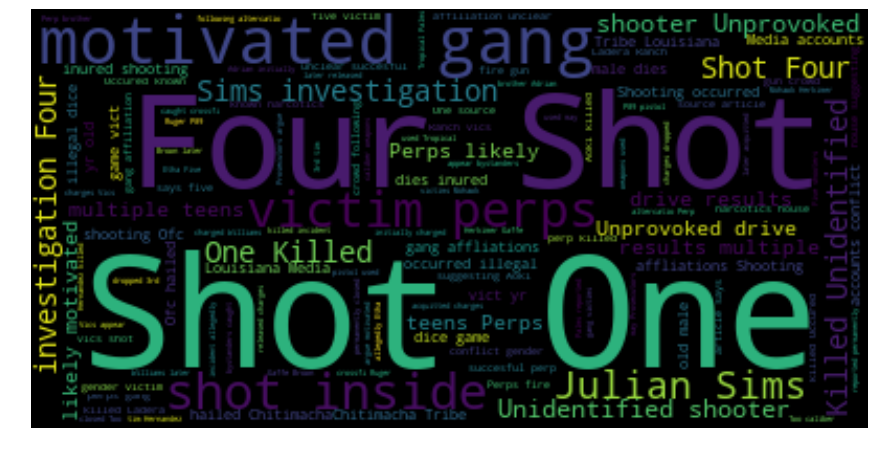

In [1191]:
wordcloud = WordCloud().generate(str(text2))
sb.set(rc={'figure.figsize':(15,10)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

** *We have looked at states so far but now we look at the cities or counties most affected by gun-violence, try and find the reason behind it and see if we can find out some attributes that play a key role in this.* **

In [1192]:
x4=df.groupby(['city_or_county'])[['n_killed','n_injured']].agg('sum').reset_index().sort_values(['n_killed','n_injured'],ascending=False)
x4['total-incidents']=x4['n_killed']+x4['n_injured']
x4.head()

,city_or_county,n_killed,n_injured,total-incidents
2019,Chicago,2104,10427,12531
5303,Houston,1145,1255,2400
530,Baltimore,1055,2427,3482
10152,Saint Louis,919,1783,2702
9018,Philadelphia,901,2326,3227


In [1193]:
trace0 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x4['city_or_county'],
    y = x4['n_killed']+x4['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout(    title='Cities and Counties with the most incidents',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[0,75],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

The draw time for this plot will be slow for clients without much RAM.


C:\Users\Isha\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [1202]:
x4['total-incidents'].sum()
x4['PercentIncidents']=(x4['total-incidents']/x4['total-incidents'].sum())*100
x4=x4.sort_values(['PercentIncidents'],ascending=False)
x4.head()
#Just a look at this data tells us that Chicago has far more incidents compared to any other city, after Chicago we have Baltimore and Philadelphia which have almost 3 times less incidents than Chicago.

,city_or_county,n_killed,n_injured,total-incidents,PercentIncidents
2019,Chicago,2104,10427,12531,7.005647
530,Baltimore,1055,2427,3482,1.946665
9018,Philadelphia,901,2326,3227,1.804104
10152,Saint Louis,919,1783,2702,1.510594
8060,New Orleans,703,1892,2595,1.450774


*Looking at the statistics for guns that are available in a state, and the state with the most number of guns. This statistic might not prove anything but we can safely assume that a place with more guns is more bound to be prone to affected by any kind of violence.*

In [1370]:
x5=df.groupby(['state'])['n_guns_involved'].agg(sum).reset_index()
x5['PercentofGuns']=(x5['n_guns_involved']/sum(x5['n_guns_involved']))*100
x5=x5.sort_values(['PercentofGuns'],ascending=False)
guns=pd.merge(x5,new_df1, how='left',left_on=['state'],right_on=['state']).dropna()
guns.head()

,state,n_guns_involved,PercentofGuns,n_killed,n_injured,state_code,total-incidents,Population,Incidentsper100k
0,California,23695.0,8.117423,5562.0,7644.0,CA,13206.0,37253956.0,35.448584
1,Illinois,19621.0,6.721753,3409.0,13514.0,IL,16923.0,12830632.0,131.895296
2,Florida,19214.0,6.582324,3909.0,7072.0,FL,10981.0,18801310.0,58.405505
3,Texas,15782.0,5.406591,5046.0,6106.0,TX,11152.0,25145561.0,44.349776
4,Ohio,12553.0,4.300401,2508.0,5703.0,OH,8211.0,11536504.0,71.174075


In [1244]:
print("                       TOP 20 STATES WITH THE HIGHEST GUN OWENERSHIP")
trace = go.Pie(labels=x5['state'][0:20], values=round(x5['PercentofGuns'],2)[0:20],
               hoverinfo='label', textinfo='labels-value', 
               textfont=dict(size=20),
               marker=dict( 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(
    title='Top 20 states with the percentage of gun')
py.iplot([trace], layout=layout,filename='styled_pie_chart',)

                       TOP 20 STATES WITH THE HIGHEST GUN OWENERSHIP


*We look at gun possession rates across the states and easy to see that California, Florida, Texas are some of the few states with the highest gun ownership among states. *
> *In California alone there are 28,000 guns, responsible for some 18,000 over gun related incidents.*
*On an averge each states has some 5000 guns.*

In [1383]:
df['weapon']=df['gun_type'].str.split("|",expand=True)[0].str[3:]
df['weapon'][df['weapon']=='Unknown']=np.nan
x8=df[df['weapon'].isnull()==False]
x8=x8.groupby(['weapon'])['n_killed','n_injured'].agg(sum).reset_index().sort_values(['n_killed'],ascending=False)
x8.head()

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,weapon,n_killed,n_injured
32,Handgun,2712,4463
31,9mm,640,950
35,Shotgun,539,794
34,Rifle,466,606
9,22 LR,330,545


*The gun data type was partially incomplete, but the data that was available we leverage it to determine how many people were injured by different kind of guns. It is very clear that **HandGun** was responsible for a major chunk of crimes and we should probably have stricter regualtions for that.*

In [1385]:
trace0 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox'
)
trace1 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x8['weapon'],
    y = x8['n_killed']+x8['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout( title='Deaths and injuries caused by different type of guns',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='Types of Guns',
        range=[0,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

On average each state has guns 5723.588235294118


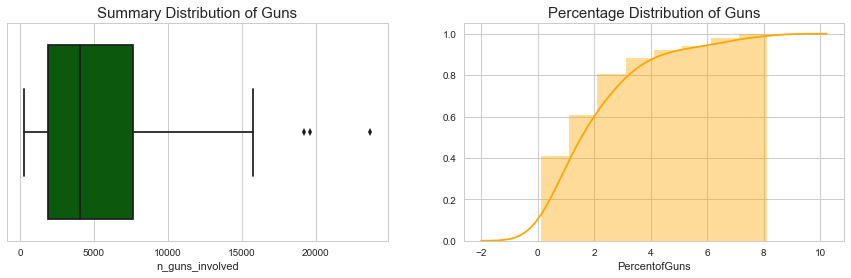

In [1230]:
sb.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.boxplot(x5['n_guns_involved'],color='DarkGreen',ax=ax1)
ax1.set_title("Summary Distribution of Guns",fontsize=15)
plt.xlabel("Number of Guns involved")
sb.distplot(x5.PercentofGuns,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True),color='Orange',ax=ax2)
ax2.set_title("Percentage Distribution of Guns",fontsize=15)
print("On average each state has guns",x5['n_guns_involved'].mean())

In [1235]:
#Percentage of Gun Ownership in each state
x6=df.groupby(['city_or_county'])['n_guns_involved'].agg(sum).reset_index()
x6['PercentofGuns']=(x6['n_guns_involved']/totalguns)*100
x6=x6.sort_values(['PercentofGuns'],ascending=False)
x6.head()

,city_or_county,n_guns_involved,PercentofGuns
2019,Chicago,11550.0,3.956794
530,Baltimore,4544.0,1.556682
12154,Washington,3991.0,1.367235
8060,New Orleans,3196.0,1.094884
9018,Philadelphia,3098.0,1.061311


In [1388]:
print("                       TOP 20 CITIES WITH THE HIGHEST GUN OWNERSHIP")
trace = go.Pie(labels=x6['city_or_county'][0:20], values=round(x6['PercentofGuns'],2)[0:20],
               hoverinfo='label', textinfo='labels-value', 
               textfont=dict(size=20),
               marker=dict( 
                           line=dict(color='#000000', width=2)))
layout = go.Layout(
    title='Top 20 states with the percentage of gun')
py.iplot([trace], layout=layout,filename='styled_pie_chart')

                       TOP 20 CITIES WITH THE HIGHEST GUN OWNERSHIP


** *Chicago** does look like America's gun capital here with 19.1% gun ownership, just to put it in perspective California had 10% gun ownership which was the highest among states.*

## *Now we will look at Domestic Violence Incidents and try and see who is mostly affected have a division between Suspect and Victim.*

*The first step here is to look at the the total incidents and classify them on basis of gender*

In [1253]:
women=len(df[(df['participant1_gender']=='F') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='F') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='F') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='F') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='F') & (df['participant5_type']=='Suspect')])
men=len(df[(df['participant1_gender']=='M') & (df['participant1_type']=='Suspect')])+len(df[(df['participant2_gender']=='M') & (df['participant2_type']=='Suspect')])+len(df[(df['participant3_gender']=='M') & (df['participant3_type']=='Suspect')])+len(df[(df['participant4_gender']=='M') & (df['participant4_type']=='Suspect')])+len(df[(df['participant5_gender']=='M') & (df['participant5_type']=='Suspect')])

In [1255]:
df_gender={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}

*Only 6% of the total crimes are commited by a woman. *

In [1257]:
pd.DataFrame(df_gender)

,Gender,Percent-Suspects,Suspects
0,men,93.34,156804
1,women,6.66,11192


Total incidents where the police had a suspect 167996
Total incidents where the police had a female suspect 11192
Total incidents where the police had a male suspect 156804


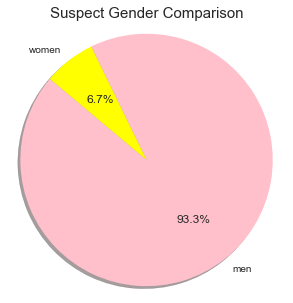

In [1356]:
total=women+men
print("Total incidents where the police had a suspect",total)
print("Total incidents where the police had a female suspect",women)
print("Total incidents where the police had a male suspect",men)
df_gender={'Gender':['men','women'],
    'Suspects':[men,women],
     'Percent-Suspects':[round((men/total)*100,2),round((women/total)*100,2)]}
df_gender=pd.DataFrame(df_gender)
sb.set(rc={'figure.figsize':((5,5))})
colors = ['Pink','Yellow']
plt.pie(df_gender['Percent-Suspects'], labels=df_gender['Gender'],
        autopct='%1.1f%%', shadow=True, startangle=140,colors=colors)
plt.axis('equal')
plt.title("Suspect Gender Comparison",fontsize=15)
plt.show()

# Domestic Violence Abuse cases - Deepdive

In [1260]:
abuse_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
totaldomestic=len(df['domestic violence']==True)
abuse_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Suspect')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Suspect')&(df['domestic violence']==True))])
victim_female=len(df[((df['participant1_gender']=='F')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='F')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='F')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='F')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='F')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])
victim_male=len(df[((df['participant1_gender']=='M')&(df['participant1_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant2_gender']=='M')&(df['participant2_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant3_gender']=='M')&(df['participant3_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant4_gender']=='M')&(df['participant4_type']=='Victim')&(df['domestic violence']==True))])+len(df[((df['participant5_gender']=='M')&(df['participant5_type']=='Victim')&(df['domestic violence']==True))])

In [1261]:
x10={'Gender':['Male','Female'],
     'DomesticAbuse-Suspects':[abuse_male,abuse_female],
     'PercentDomesticAbuse-Suspects':[round((abuse_male/(abuse_male+abuse_female))*100,2),round((abuse_female/(abuse_male+abuse_female))*100,2)],
      'TotalSuspects':[men,women],
       'DomesticAbuse-Victims':[victim_male,victim_female],
       'PercentDomesticAbuse-Victims':[round((victim_male/(victim_male+victim_female))*100,2),round((victim_female/(victim_male+victim_female))*100,2)]
   }
x10=pd.DataFrame(x10)
x10.head()

,DomesticAbuse-Suspects,DomesticAbuse-Victims,Gender,PercentDomesticAbuse-Suspects,PercentDomesticAbuse-Victims,TotalSuspects
0,8651,4473,Male,86.06,44.88,156804
1,1401,5493,Female,13.94,55.12,11192


Text(0.5,1,'Domestic Abuse Victims comparison between Men and Women')

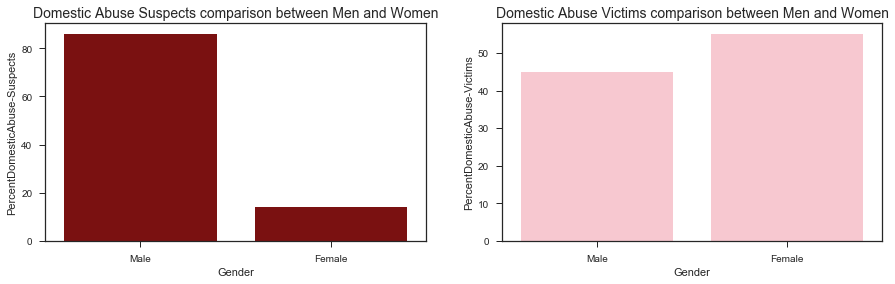

In [1387]:
sb.set_style("ticks")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,4))
sb.barplot(x10['Gender'],x10['PercentDomesticAbuse-Suspects'],color='DarkRed',ax=ax1)
ax1.set_title("Domestic Abuse Suspects comparison between Men and Women",fontsize=14)
sb.barplot(x10['Gender'],
           x10['PercentDomesticAbuse-Victims'],color='Pink',ax=ax2)
ax2.set_title("Domestic Abuse Victims comparison between Men and Women",fontsize=14)

In [1263]:
dom=df[df['domestic violence']==True]

*A state wise look at domestic violence crimes*

In [1264]:
state_dom=dom.groupby(['state'])[['n_killed','n_injured']].agg(sum).reset_index()
state_dom=state_dom.sort_values(['n_killed','n_injured'],ascending=False)
state_dom.head()

,state,n_killed,n_injured
43,Texas,731,330
9,Florida,501,322
4,California,374,182
35,Ohio,369,253
10,Georgia,354,186


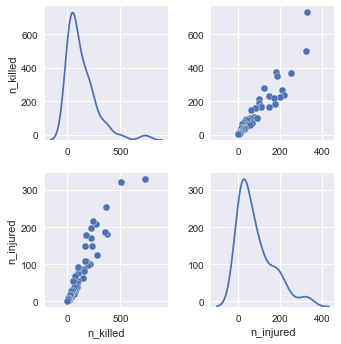

In [1267]:
sb.pairplot(state_dom, palette="Set2", diag_kind="kde")

Text(0.5,1,'Top 20 states with the most fatalities because of domestic violence')

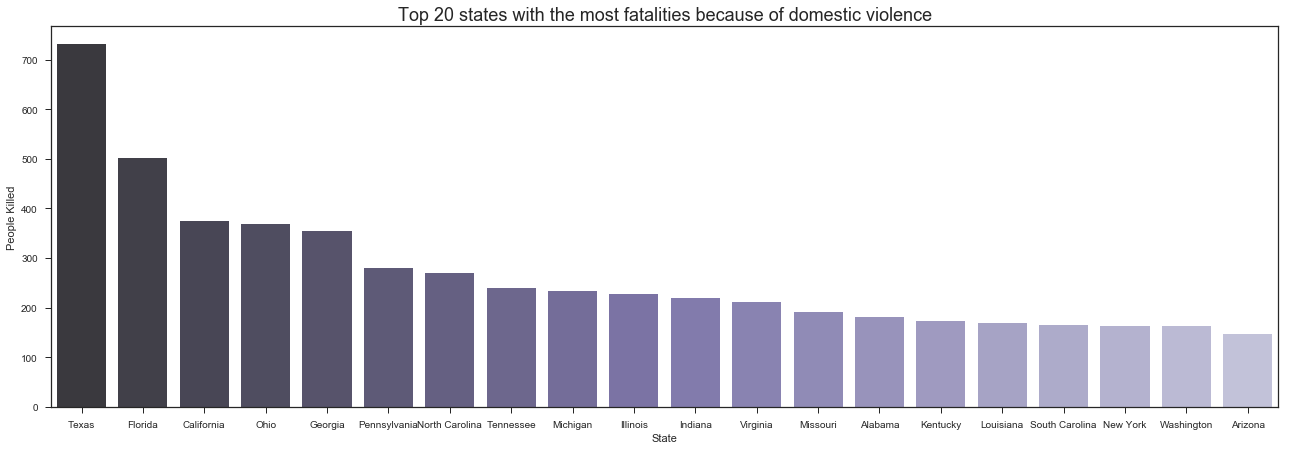

In [1218]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_killed'][0:20],palette="Purples_d")
plt.xlabel("State")
plt.ylabel("People Killed")
plt.title("Top 20 states with the most fatalities because of domestic violence",fontsize=18)

Text(0.5,1,'Top 20 states with the most injuries because of domestic violence')

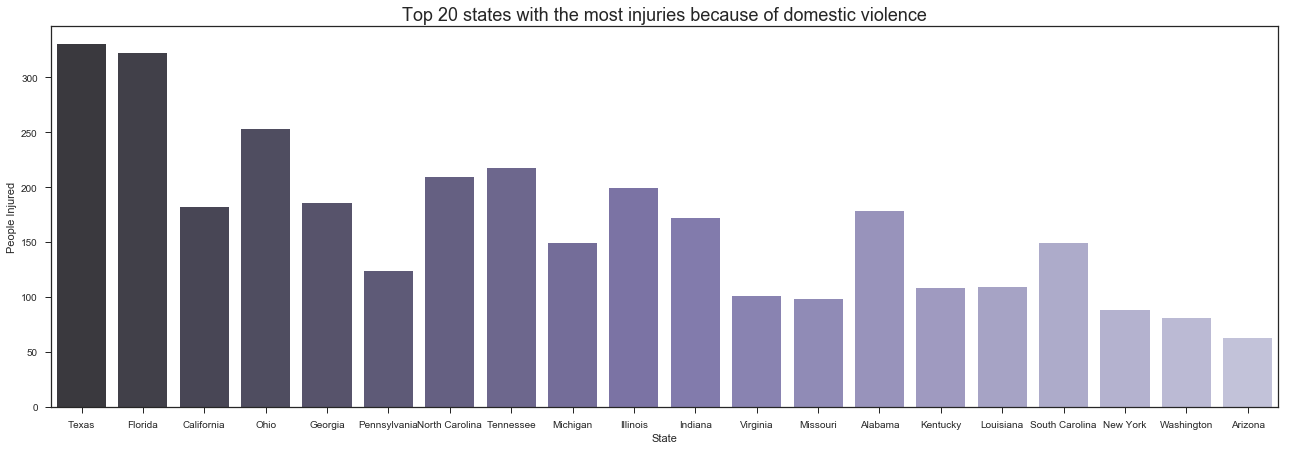

In [1389]:
sb.set(rc={'figure.figsize':((22,7))})
sb.set_style("ticks")
sb.barplot(state_dom['state'][0:20],state_dom['n_injured'][0:20],palette="Purples_d")
plt.xlabel("State")
plt.ylabel("People Injured")
plt.title("Top 20 states with the most injuries because of domestic violence",fontsize=18)

In [820]:
data=[]
indices=dom['notes'][dom['notes'].isnull()==False].index
for i in indices:
    data.append(dom['notes'][dom['notes'].isnull()==False][i])

*Forming a wordcloud to see if there is any more information we can derive from the text.*

(-0.5, 399.5, 199.5, -0.5)

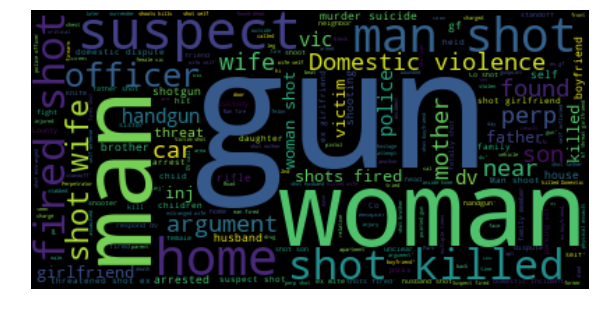

In [825]:
wordcloud = WordCloud().generate(str(data))
sb.set(rc={'figure.figsize':(10,8)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [838]:
x9=dom[dom['notes'].isnull()==False]

# Drug Related incidents deepdive

In [864]:
drug=df[df['drug']==True]

In [867]:
x10=drug.groupby(['state'])[['n_killed','n_injured']].agg('sum').reset_index().sort_values(['n_killed'],ascending=False)
x10.head()

,state,n_killed,n_injured
43,Texas,306,281
9,Florida,193,243
35,Ohio,166,193
4,California,155,169
38,Pennsylvania,146,138


In [877]:
trace0 = go.Scatter(
    x = x10['state'],
    y = x10['n_killed'],
    mode = 'lines+markers',
    name = 'People-killed'
    ,
    fill='tozerox',
    fillcolor='Yellow'
)
trace1 = go.Scatter(
    x = x10['state'],
    y = x10['n_injured'],
    mode = 'lines+markers',
    name = 'People-injured'

)
trace2 = go.Scatter(
    x = x10['state'],
    y = x10['n_killed']+x10['n_injured'],
    mode = 'lines+markers',
    name = 'People-affected'
)

layout = go.Layout( title='Gun Incidents caused by Drug Related Incidents',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[0,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0,trace1,trace2]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

In [873]:
drug_data=[]
indices=drug['notes'][drug['notes'].isnull()==False].index
for i in indices:
    drug_data.append(drug['notes'][drug['notes'].isnull()==False][i])

*A wordcloud to see drug related crimes notes can provide us some additional information, and we see it mentions traffic, money, drugdeal and marijuana.*

(-0.5, 399.5, 199.5, -0.5)

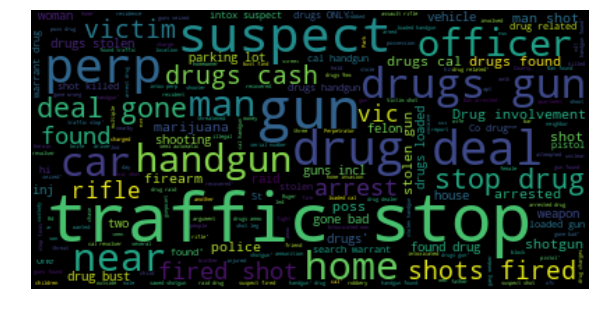

In [874]:
wordcloud = WordCloud().generate(str(drug_data))
sb.set(rc={'figure.figsize':(10,8)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [880]:
x11=pd.merge(x10,states, how='left',left_on=['state'],right_on=['State']).dropna()
x11=x11.drop(['Rank','State'],axis=1)
x11=x11.sort_values(['n_killed'],ascending=False)

In [892]:
x11['incidentsper100k']=((x11['n_killed']+x11['n_injured'])/x11['Population'])*100000
x11=x11.sort_values(['incidentsper100k'],ascending=False)

In [895]:
trace0 = go.Scatter(
    x = x11['state'],
    y = x11['incidentsper100k'],
    mode = 'markers',
    name = 'People-killed'
    ,
    fill='tozerox',
    fillcolor='LightBlue'
)
layout = go.Layout( title='Gun Incidents caused by Drug per 100k in each state',
    xaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='City',
        range=[0,50],
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='outside',
        zeroline=True
    ),
    yaxis=dict(
        gridcolor='rgb(255,255,255)',
        title='People affected by Gun-Violence',
        showgrid=True,
        showline=False,
        showticklabels=True,
        tickcolor='rgb(127,127,127)',
        ticks='inside',
        zeroline=True
    ),
)

data=[trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename= 'shaded_lines')

*Alaska has the highest gun violence per 100k and falls behind Illinois and Texas.*

In [897]:
x11=x11.drop(['incidents_per_100k'],axis=1)

In [902]:
print("There will be around", round(max(x11['incidentsper100k']),1),"incidents per 100000 people in Alaska due to gun-related incidents")

There will be around 10.6 incidents per 100000 people in Alaska due to gun-related incidents


In [916]:
print("Texas has the highest number of drug related incidents in the state is",int(x11['n_killed'][x11['state']=='Texas']+x11['n_injured'][x11['state']=='Texas']),"but incidents per 100k are",int(x11['incidentsper100k'][x11['state']=='Texas']))

Texas has the highest number of drug related incidents in the state is 587 but incidents per 100k are 2


## Trying to build a small regression model to see what does the future hold if no changes are made to the current regualtions and systems.

In [928]:
x12=drug.groupby(['Year','Month'])['n_killed','n_injured','n_guns_involved'].agg(sum).reset_index()

In [930]:
x12['total-incidents']=x12['n_killed']+x12['n_injured']
x12.head()

,Year,Month,n_killed,n_injured,n_guns_involved,total-incidents
0,2013,1,4,0,1.0,4
1,2013,2,4,1,1.0,5
2,2013,3,1,3,1.0,4
3,2013,4,4,0,1.0,4
4,2013,5,9,20,4.0,29


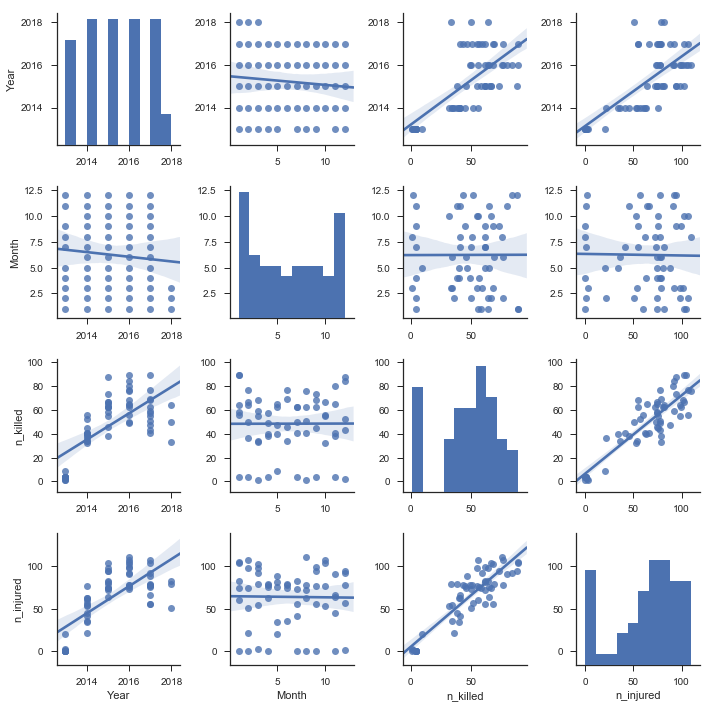

In [1021]:
#plotting a pair plor between all the columns of the dataset.
sb.pairplot(x12, vars=['Year', 'Month', 'n_killed','n_injured'],
                 kind='reg')

C:\Users\Isha\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



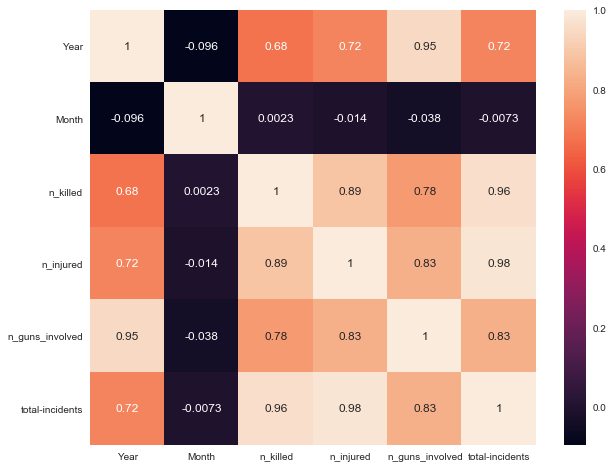

In [973]:
import statsmodels.api as sm
sb.heatmap(x12.corr(),annot=True)

*A correlation matrix between the columns.*

In [1006]:
independent=['Year','Month']
dependent=['total-incidents']
x=x12[independent]
y=x12[dependent]

In [993]:
y.shape

(61, 1)

In [1007]:
model=sm.OLS(y,x)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        total-incidents   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 06 Aug 2018   Prob (F-statistic):           1.63e-21
Time:                        03:39:04   Log-Likelihood:                -331.75
No. Observations:                  61   AIC:                             667.5
Df Residuals:                      59   BIC:                             671.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0561      0.007      7.694      0.000       0.042       0.071
Month         -0.1285      2.052     -0.063      0.950      -4.235       3.978
==============================================================================
Omnibus:                        6.516   Durbin-Watson:                   0.248
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.699
Skew:                          -0.792   Prob(JB):                       0.0351
Kurtosis:                       2.647   Cond. No.                         571.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1390]:
new=[2018,8]

In [1392]:
print("Incidents in the month of August for this year should be around",result.predict(new))

Incidents in the month of August for this year should be around [ 112.18805495]


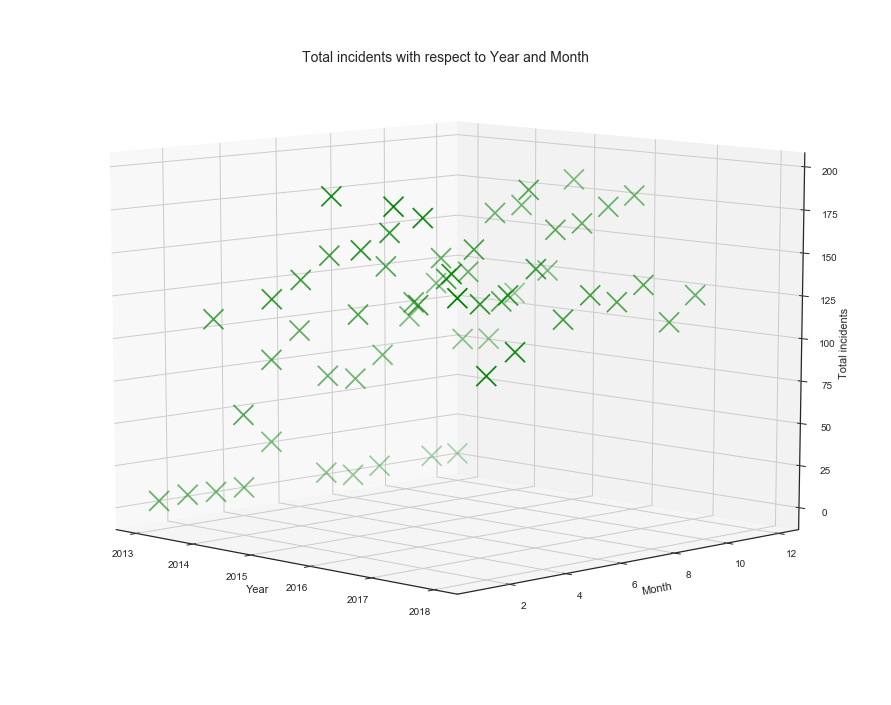

In [1014]:
from mpl_toolkits.mplot3d import Axes3D
sb.set_style("ticks")
fig=plt.figure()
fig.set_size_inches(15.5, 12.5)
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xs=x12['Year'],ys=x12['Month'],zs=x12['total-incidents'],color='Green',marker='x',s=20**2)
ax.set_ylabel('Month'); ax.set_xlabel('Year'); ax.set_zlabel('Total incidents')
ax.set_title("Total incidents with respect to Year and Month",fontsize=14)
ax.view_init(10, -45)

*This graph shows us that 2013 started off slow but after that the incidents per month per year have been consistent and relatively high.*

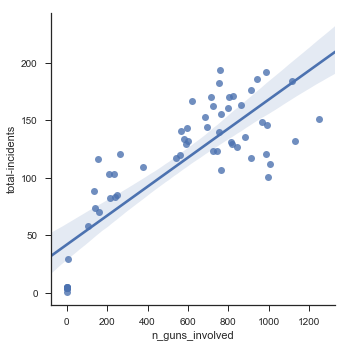

In [1022]:
#A futile attempt to see if there is some correlation between number of guns and the total incidents that happen across the country.
sb.lmplot(y='total-incidents', x='n_guns_involved', data=x12)  

# Conclusion:
*This model is a building block for more intricate and advanced analysis system in place that can help the government and police to control these mindless gun related crimes that have plagued the country and this can also provide some idea about the states that need more help comapred to thers, guns that are the cause of these crimes, why are women more unsafe then men, why are convicted felons have a gun, why is domestic violence not a grave crime*

*The next notebook <a> http://nbviewer.jupyter.org/github/ishachawla/Gun-Violence-/blob/master/Bayesian_Approach.ipynb</a> gives a more accurate comparison between states using MCMC and using those random events to determine how do states stand against each other.*

**References**
1. http://www.gunviolencearchive.org/analysis-opinion
2. https://www.kaggle.com/shivamb/deep-exploration-of-gun-violence-in-us
3. https://github.com/amueller/word_cloud
4. http://www.nltk.org/book/ch01.html